In [1]:
import os
for dirname, _, filenames in os.walk('/Users/ckska/repo/covid_check/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/ckska/repo/covid_check/.gitignore
/Users/ckska/repo/covid_check/building_list_eng.csv
/Users/ckska/repo/covid_check/covid_check.ipynb
/Users/ckska/repo/covid_check/covid_check.ps1
/Users/ckska/repo/covid_check/covid_check.py
/Users/ckska/repo/covid_check/D14_AG_Chart.png
/Users/ckska/repo/covid_check/enhanced_sur_covid_19_eng.csv
/Users/ckska/repo/covid_check/hkg_adm1.geojson
/Users/ckska/repo/covid_check/hkg_adm1.geojson.json
/Users/ckska/repo/covid_check/large_clusters_eng.csv
/Users/ckska/repo/covid_check/LICENSE
/Users/ckska/repo/covid_check/README.md
/Users/ckska/repo/covid_check/sample.csv
/Users/ckska/repo/covid_check/.git\COMMIT_EDITMSG
/Users/ckska/repo/covid_check/.git\config
/Users/ckska/repo/covid_check/.git\description
/Users/ckska/repo/covid_check/.git\FETCH_HEAD
/Users/ckska/repo/covid_check/.git\HEAD
/Users/ckska/repo/covid_check/.git\index
/Users/ckska/repo/covid_check/.git\ORIG_HEAD
/Users/ckska/repo/covid_check/.git\packed-refs
/Users/ckska/repo/covid_check/.g

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline


In [4]:
import matplotlib.style
print(plt.style.available) # see what styles are available
mpl.style.use('Solarize_Light2')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv('enhanced_sur_covid_19_eng.csv')
df.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [6]:
df.shape


(7804, 10)

In [7]:
df.columns


Index(['Case no.', 'Report date', 'Date of onset', 'Gender', 'Age',
       'Name of hospital admitted', 'Hospitalised/Discharged/Deceased',
       'HK/Non-HK resident', 'Case classification*', 'Confirmed/probable'],
      dtype='object')

In [8]:
df.set_index('Case no.', inplace = True)
df

,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
Case no.,,,,,,,,,
1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed
...,...,...,...,...,...,...,...,...,...
7800,16/12/2020,Asymptomatic,F,58,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
7801,16/12/2020,Asymptomatic,F,49,NaN,To be provided,HK resident,Local case,Confirmed
7802,16/12/2020,14/12/2020,F,65,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed


In [9]:
df.rename(columns = {'Case classification*': 'Case classification'}, inplace = True)
df

,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification,Confirmed/probable
Case no.,,,,,,,,,
1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed
...,...,...,...,...,...,...,...,...,...
7800,16/12/2020,Asymptomatic,F,58,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
7801,16/12/2020,Asymptomatic,F,49,NaN,To be provided,HK resident,Local case,Confirmed
7802,16/12/2020,14/12/2020,F,65,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed


In [10]:
df['Name of hospital admitted'].value_counts(dropna = False)


NaN    7804
Name: Name of hospital admitted, dtype: int64

In [11]:
df['Case classification'].value_counts()


Epidemiologically linked with local case             3838
Local case                                           2023
Imported case                                        1737
Possibly local case                                   103
Epidemiologically linked with possibly local case      62
Epidemiologically linked with imported case            41
Name: Case classification, dtype: int64

In [12]:
df.head()
df.tail()


,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification,Confirmed/probable
Case no.,,,,,,,,,
7800,16/12/2020,Asymptomatic,F,58,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
7801,16/12/2020,Asymptomatic,F,49,NaN,To be provided,HK resident,Local case,Confirmed
7802,16/12/2020,14/12/2020,F,65,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed
7803,16/12/2020,11/12/2020,M,40,NaN,To be provided,HK resident,Local case,Confirmed
7804,16/12/2020,11/12/2020,F,78,NaN,To be provided,HK resident,Local case,Confirmed


In [13]:
df['Date of onset'].value_counts()


Asymptomatic    2171
27/07/2020       131
25/07/2020       118
24/07/2020       113
22/07/2020       106
                ... 
04/11/2020         1
Mid- July          1
17/06/2020         1
18/01/2020         1
05/03/2020         1
Name: Date of onset, Length: 286, dtype: int64

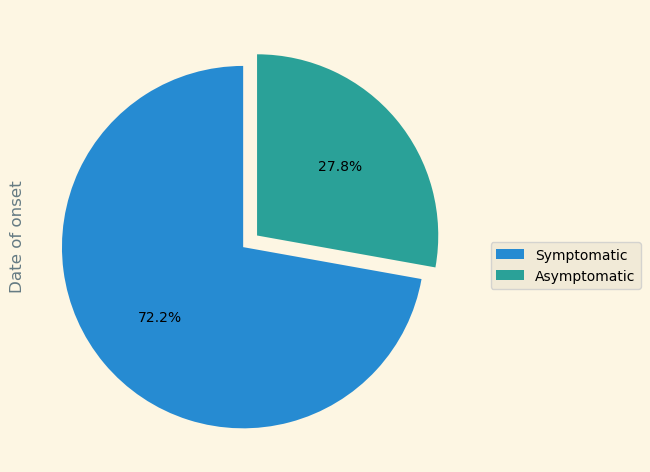

In [14]:
df_asym = df.copy()
df_asym = df_asym.replace(to_replace=r"^(.(?<!Asymptomatic))*?$", value = "Symptomatic", regex = True)
fig = plt.figure(figsize=(6,6), dpi=100)
df_asym['Date of onset'].value_counts().plot.pie(startangle = 90, autopct = '%1.1f%%', labels = None, explode = (0.1, 0))
plt.legend(labels = df_asym['Date of onset'].value_counts().index, bbox_to_anchor =(1, 0.5))
plt.show()

In [15]:
df_gender = df['Gender'].value_counts()
df_gender

F    3991
M    3813
Name: Gender, dtype: int64

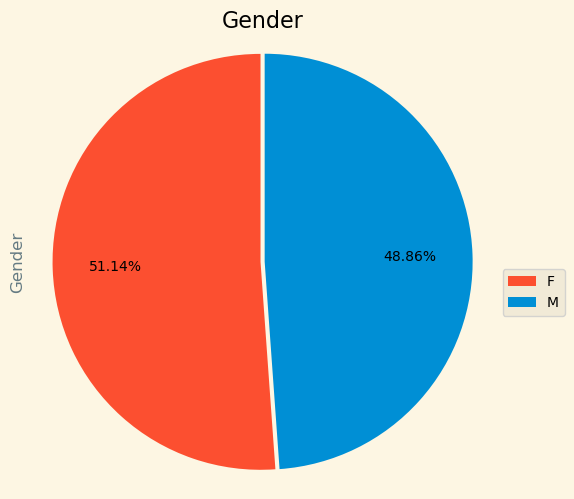

In [16]:
# Gender Plot
fig = plt.figure(figsize=(6,6), dpi=100)
colors = ['#fc4f30','#008fd5']
plt.title('Gender')
df_gender.plot(kind = 'pie',labels = None ,colors = colors, startangle = 90, autopct='%1.2f%%',pctdistance=0.7, explode = (0.01, 0.01))
plt.legend(labels=df_gender.index, bbox_to_anchor =(1, 0.5)) 
plt.axis('equal')
plt.show()

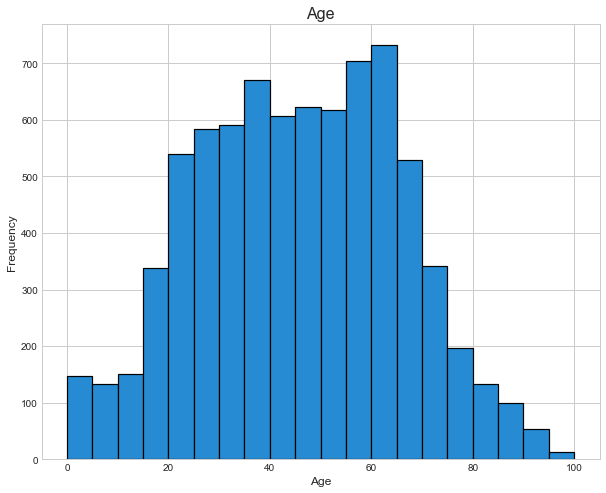

In [17]:
# Age Plot
count, bin_edges = np.histogram(df['Age'], 20)
plt.style.use('seaborn-whitegrid')
plt.title('Age')
df['Age'].plot(kind = 'hist', figsize = (10,8), bins =bin_edges, edgecolor = 'black', linewidth = 1.2)
plt.xlabel("Age")
plt.show()

In [18]:
df_residence = df['HK/Non-HK resident'].value_counts()
df_residence

HK resident        7461
Non-HK resident     290
HK Resident          42
Non-HK Resident       7
non-HK resident       3
Pending               1
Name: HK/Non-HK resident, dtype: int64

In [19]:
df.replace({'HK resident' : 'HK Resident', 'Non-HK resident':'Non-HK Resident'}, inplace = True)
df_residence = df['HK/Non-HK resident'].value_counts()
df_residence

HK Resident        7503
Non-HK Resident     297
non-HK resident       3
Pending               1
Name: HK/Non-HK resident, dtype: int64

ValueError: 'explode' must be of length 'x'

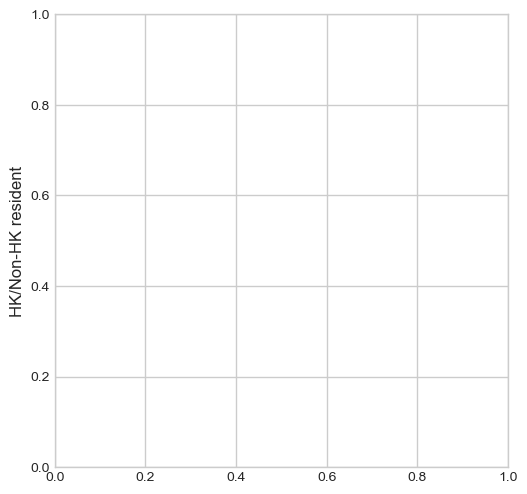

In [20]:
fig = plt.figure(figsize=(6,6), dpi=100)
df_residence.plot(kind = 'pie', autopct = '%1.2f%%', pctdistance = 1.1, startangle = 90, labels = None, explode = (0.3, 0.3, 0))
plt.legend(labels=df_residence.index, loc='center left', shadow = True, bbox_to_anchor =(1, 0.5))
plt.axis('equal')

plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6), dpi=100)
df['Case classification'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', pctdistance = 1.15, startangle = 90, labels = None, explode = (0,0.05,0.1,0.15,0.2,0.25))
plt.legend(labels = df['Case classification'].value_counts().index, bbox_to_anchor =(1, 0.5))
plt.show()

In [ ]:
date = df['Report date']
df_date = pd.DataFrame(date.value_counts())
df_date.reset_index(inplace = True)
df_date.columns = ['Report date', 'Cases']
df_date['Report date'] = pd.to_datetime(df_date['Report date'], format = '%d/%m/%Y')
df_date.sort_values(['Report date'], inplace = True)
df_date.set_index('Report date', inplace = True)
df_date['Cumulative Cases'] = df_date['Cases'].cumsum()

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_ylabel('Daily Confirmed Cases', color = '#fc4f30')
ax1.set_xlabel('Date')
ax1 = df_date['Cases'].plot(color = '#fc4f30')

ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Confirmed Cases', color = '#008fd5')
ax2 = df_date['Cumulative Cases'].plot(kind = 'area', alpha = 0.3, color = '#008fd5')

ax2.grid(False)

In [ ]:
#import another dataset
df_building = pd.read_csv('building_list_eng.csv')
df_building.head()


In [ ]:
df_building.shape


In [ ]:
df_building.describe()


In [ ]:
df_district = pd.DataFrame(df_building['District'].value_counts())
df_district.reset_index(inplace = True)
df_district.columns = ['District', 'Cases Count']
df_district.replace({'Central & Western' : 'Central and Western'}, inplace = True)
df_district

In [ ]:
import folium
import geojson
hk_map = folium.Map(location = [22.34, 114.1], zoom_start = 11, tiles = 'cartodbpositron')
hk_map

In [ ]:
hk_geo = geojson.load(open('hkg_adm1.geojson'))


In [ ]:
choropleth = folium.Choropleth(geo_data = hk_geo,
                  name = 'choropleth',
                  data = df_district, 
                  columns = ['District', 'Cases Count'],
                 key_on = 'feature.properties.name_1',
                 fill_color = 'PuRd',
                 legend_name = 'Cases Count',
                 highlight = True).add_to(hk_map)

toollip = folium.features.GeoJsonTooltip(fields = ['name_1'], aliases = ['District: '])
choropleth.geojson.add_child(toollip)

hk_map